In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
% matplotlib inline

UsageError: Line magic function `%` not found.


## EDA

Loading the dataset

In [2]:
dataset = pd.read_csv(Path.cwd().parent.joinpath("data", "cleaned_data.csv"))
dataset.head()

,year,month,var,value
0,1999,1,imae,52.197280
1,1999,2,imae,48.747353
2,1999,3,imae,50.386924
3,1999,4,imae,47.016367
4,1999,5,imae,48.617007


 We transform it to wide format

In [3]:
dataset_wide = pd.pivot(dataset, index=["year", "month"], columns='var', values='value').reset_index()
dataset_wide.loc[:, "date"] = dataset_wide.loc[:, "year"].astype(str) + "-" + dataset_wide.loc[:, "month"].astype(str)
dataset_wide.loc[:, "date"] = pd.to_datetime(dataset_wide.loc[:, "date"] )
dataset_wide.head()

var,year,month,chn_m,chn_x,crude_oil_brent,crude_oil_wti,exp,gas_henry_hub,gold,imae,...,treasury3month,treasury4week,treasury6month,ue_m,ue_x,usa_m,usa_x,usdollar_euro,yuan_dollar_spot_tc,date
0,1999,1,1.215118e+10,1.378254e+10,11.114500,12.514737,528.559625,1.849474,NaN,52.197280,...,4.335263,NaN,4.328947,6.874581e+10,7.163649e+10,94349.0,78473.0,1.159095,8.278921,1999-01-01
1,1999,2,1.271262e+10,1.457695e+10,10.271579,12.013684,572.454746,1.771053,NaN,48.747353,...,4.438421,NaN,4.441053,6.729938e+10,6.961722e+10,96680.0,78212.0,1.120279,8.278137,1999-02-01
2,1999,3,1.396941e+10,1.495095e+10,12.511304,14.676522,585.525887,1.791739,NaN,50.386924,...,4.440870,NaN,4.466957,6.836457e+10,7.014471e+10,96421.0,78701.0,1.088587,8.279152,1999-03-01
3,1999,4,1.358823e+10,1.475300e+10,15.294500,17.312381,628.716318,2.150000,NaN,47.016367,...,4.289545,NaN,4.371364,6.663455e+10,6.915344e+10,97476.0,79530.0,1.070050,8.279186,1999-04-01
4,1999,5,1.457009e+10,1.592297e+10,15.225263,17.718500,554.241723,2.260000,NaN,48.617007,...,4.498500,NaN,4.559000,6.803258e+10,6.904065e+10,99585.0,79539.0,1.063005,8.278535,1999-05-01


The shape

In [4]:
dataset_wide.shape

(287, 29)

### plots

First the exports and imports flows. We can see to moments with a big drop, the recession and the covid

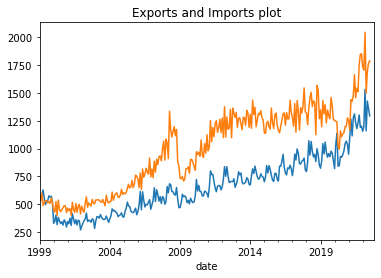

In [5]:
plt.title("Exports and Imports plot")
dataset_wide.set_index("date")["exp"].plot()
dataset_wide.set_index("date")["imp"].plot()
plt.show()

Now USA's X and M

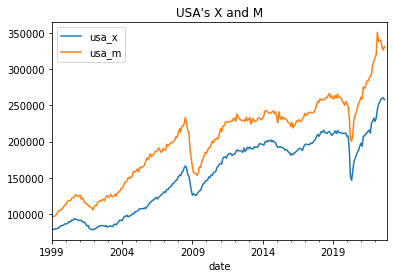

In [6]:
plt.title("USA's X and M")
dataset_wide.set_index("date")["usa_x"].plot()
dataset_wide.set_index("date")["usa_m"].plot()
plt.legend(loc="upper left")
plt.show()

China's X - M

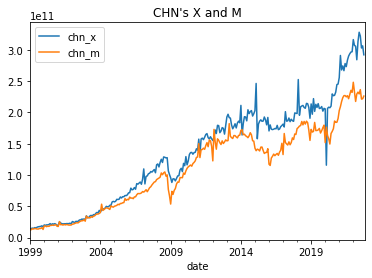

In [7]:
plt.title("CHN's X and M")
dataset_wide.set_index("date")["chn_x"].plot()
dataset_wide.set_index("date")["chn_m"].plot()
plt.legend(loc="upper left")
plt.show()

UE's X and M

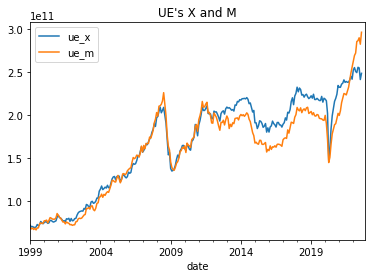

In [8]:
plt.title("UE's X and M")
dataset_wide.set_index("date")["ue_x"].plot()
dataset_wide.set_index("date")["ue_m"].plot()
plt.legend(loc="upper left")
plt.show()

The gasoline and oil vars

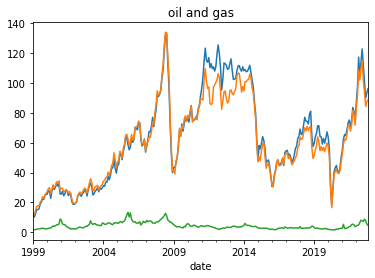

In [9]:
plt.title("oil and gas")
dataset_wide.set_index("date")["crude_oil_brent"].plot()
dataset_wide.set_index("date")["crude_oil_wti"].plot()
dataset_wide.set_index("date")["gas_henry_hub"].plot()
plt.show()

treasure variables

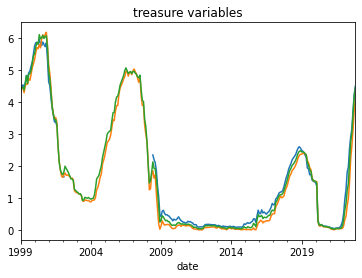

In [10]:
plt.title("treasure variables")
dataset_wide.set_index("date")["treasury1year"].plot()
dataset_wide.set_index("date")["treasury3month"].plot()
dataset_wide.set_index("date")["treasury6month"].plot()
plt.show()

As they are, basically, equals we select only the 3 month frecuency. Now we check local TC with US

<AxesSubplot:xlabel='date'>

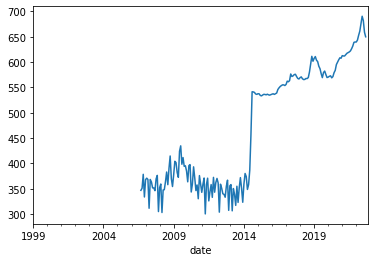

In [11]:
dataset_wide.set_index("date")["tc_buy"].plot()

Let check for the Nans

In [12]:
dataset_wide.isna().sum()

var
year                        0
month                       0
chn_m                       1
chn_x                       1
crude_oil_brent             0
crude_oil_wti               0
exp                         4
gas_henry_hub               0
gold                       70
imae                        4
imp                         4
mil_count                 129
monex_amount_mean         109
nominal_broad_usdollar     84
tc_buy                     94
tc_monex                  109
tc_sell                    93
tpm                        88
treasury1year              79
treasury3month              0
treasury4week              30
treasury6month              0
ue_m                        3
ue_x                        3
usa_m                       2
usa_x                       2
usdollar_euro               0
yuan_dollar_spot_tc         0
date                        0
dtype: int64

The last two months of exp are nan

In [13]:
dataset_wide.set_index("date").loc[:, ["exp"]].isna()

var,exp
date,
1999-01-01,False
1999-02-01,False
1999-03-01,False
1999-04-01,False
1999-05-01,False
...,...
2022-07-01,False
2022-08-01,True
2022-09-01,True


We create our finally dataset in wide format, with the log of exp as the first column

In [14]:
final_dataset = dataset_wide.loc[:, ["date", "exp", "imp", "imae", 
                                     "crude_oil_brent", "gas_henry_hub", "treasury3month",
                                     "yuan_dollar_spot_tc", "usdollar_euro",
                                     "ue_m", "ue_x", "usa_x", "usa_m", "chn_x", "chn_m",
                                     "year", "month"]]
final_dataset

var,date,exp,imp,imae,crude_oil_brent,gas_henry_hub,treasury3month,yuan_dollar_spot_tc,usdollar_euro,ue_m,ue_x,usa_x,usa_m,chn_x,chn_m,year,month
0,1999-01-01,528.559625,539.682000,52.197280,11.114500,1.849474,4.335263,8.278921,1.159095,6.874581e+10,7.163649e+10,78473.0,94349.0,1.378254e+10,1.215118e+10,1999,1
1,1999-02-01,572.454746,531.069894,48.747353,10.271579,1.771053,4.438421,8.278137,1.120279,6.729938e+10,6.961722e+10,78212.0,96680.0,1.457695e+10,1.271262e+10,1999,2
2,1999-03-01,585.525887,599.843900,50.386924,12.511304,1.791739,4.440870,8.279152,1.088587,6.836457e+10,7.014471e+10,78701.0,96421.0,1.495095e+10,1.396941e+10,1999,3
3,1999-04-01,628.716318,489.165203,47.016367,15.294500,2.150000,4.289545,8.279186,1.070050,6.663455e+10,6.915344e+10,79530.0,97476.0,1.475300e+10,1.358823e+10,1999,4
4,1999-05-01,554.241723,518.387293,48.617007,15.225263,2.260000,4.498500,8.278535,1.063005,6.803258e+10,6.904065e+10,79539.0,99585.0,1.592297e+10,1.457009e+10,1999,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2022-07-01,1294.293181,1789.115105,108.781981,111.925714,7.284500,2.232500,6.735155,1.016825,2.827161e+11,2.415047e+11,259585.0,330040.0,3.220420e+11,2.363655e+11,2022,7
283,2022-08-01,NaN,NaN,NaN,100.446364,8.805652,2.630870,6.800678,1.012878,2.966727e+11,2.487559e+11,260793.0,326472.0,3.028645e+11,2.212203e+11,2022,8
284,2022-09-01,NaN,NaN,NaN,89.764762,7.880476,3.126667,7.019514,0.989881,NaN,NaN,258004.0,331287.0,3.063312e+11,2.217532e+11,2022,9
285,2022-10-01,NaN,NaN,NaN,93.331905,5.660500,3.717000,7.190185,0.985295,NaN,NaN,NaN,NaN,2.919971e+11,2.260405e+11,2022,10


we split the data into log form for exp and imp

In [15]:
final_dataset1 = final_dataset

In [16]:
final_dataset2 = final_dataset.assign(exp=lambda x: np.log(x["exp"]),
                                      imp=lambda x: np.log(x["imp"]))

We save both

In [17]:
with Path.cwd().parent.joinpath("input", "data4x_norm.csv") as e:
    final_dataset1.to_csv(e, index=False)
with Path.cwd().parent.joinpath("input", "data4x_log.csv") as e:
    final_dataset2.to_csv(e, index=False)